### Datajoint Local troubleshooting notebook

In [1]:
import datajoint as dj
from adamacs import subject
from adamacs import utility
# dj.ERD(subject.schema)

Local datajoint database setup: https://tutorials.datajoint.io/setting-up/local-database.html

In [2]:
# conda env create -f environment.yml
# docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=tutorial datajoint/mysql

In [3]:
# Setup Local configuration
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'tutorial'
dj.conn()

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

### Create schema and tables

In [4]:
utility.activate(subject.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=subject)

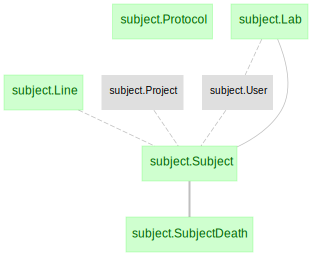

In [6]:
dj.ERD(subject.schema)

### Insert Data

In [7]:
# Insert Laboratories
lab = subject.Lab()
lab_data = [
    ('Rose',
    'AG Rose, Circuit mechanisms of behavior',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Gm',
    'AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Fm',
    'AG Fuhrmann, Neuroimmunologie und Bildgebung',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Beck',
    'AG Beck, Experimental Epileptology and Cognition Research',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET')
]

lab.insert(lab_data, skip_duplicates=True)
lab

lab short lab name,lab_name,institution,address,time_zone
Beck,"AG Beck, Experimental Epileptology and Cognition Research",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET
Fm,"AG Fuhrmann, Neuroimmunologie und Bildgebung",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Gm,"AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Rose,"AG Rose, Circuit mechanisms of behavior",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET


In [8]:
# Insert line
line = subject.Line()
line_data = [("SST-Cre", "The SST-Cre Mouse Line is Daniels favorite mouse line", "wt/tg", False),
             ("VGluT3-IRES-Cre", "", "tg/tg", False),
             ("VGluT2-Cre", "", "", False)]
line.insert(line_data, skip_duplicates=True)
line

line,line_description,target_phenotype,is_active
SST-Cre,The SST-Cre Mouse Line is Daniels favorite mouse line,wt/tg,0
VGluT2-Cre,,,0
VGluT3-IRES-Cre,,tg/tg,0


In [9]:
# Insert user
user = subject.User()
user.insert1(("danielmk",
             "Rose"))
user

DuplicateError: ("Duplicate entry 'danielmk' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [10]:
# Insert Protocol
protocol = subject.Protocol()
protocol.insert1(("LANUF2",
                 "Basic Animal Protocol"))
protocol

DuplicateError: ("Duplicate entry 'LANUF2' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [11]:
# Insert Project
project = subject.Project()
project.insert1(("Trace Eyeblink Conditioning",
                "Trace Eyeblink Conditioning Experiment on a running wheel"))
project

DuplicateError: ("Duplicate entry 'Trace Eyeblink Conditioning' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [12]:
# Insert Subjects
sub = subject.Subject()
subject_data = [
    ('1223', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning"),
    ('1223', 'Beck', 'M', '2021-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning"),
    ('1224', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning")
]
sub.insert(subject_data, skip_duplicates=True)
sub

subject,lab short lab name,sex,subject_birth_date,subject_description,line,user,project
1223,Beck,M,2021-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning
1223,Rose,M,2020-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning
1224,Rose,M,2020-08-13,Basic Mouse,SST-Cre,danielmk,Trace Eyeblink Conditioning


In [14]:
# This should raise a duplication error
sub.insert1(('1223', 'Rose', 'M', '2020-08-13', 'Basic Mouse', 'SST-Cre', 'danielmk', "Trace Eyeblink Conditioning"))
sub

DuplicateError: ("Duplicate entry '1223-Rose' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [16]:
# Record subject death
sd = subject.SubjectDeath()
sd.insert1(('1223', 'Rose', '2021-10-10', 'Perfusion'))
sd

subject,lab short lab name,death_date death date,cull_method
1223,Rose,2021-10-10,Perfusion


In [19]:
dj.ERD(subject.schema).draw()

FileNotFoundError: [WinError 2] "dot" not found in path.

In [23]:
dj.__version__

'0.13.2'